<a href="https://colab.research.google.com/github/ViniciusHenriqueOliveira/DesafioPratico/blob/main/Tarefa2%2C3%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pré-processamento dos Dados**

○ Normalizar ou padronizar variáveis numéricas, se necessário.

○ Realizar codificação para variáveis categóricas, transformando-as em valores numéricos.

○ Dividir os dados em conjuntos de treino e teste.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
arquivo = '/content/Dataset.csv'

In [6]:
df = pd.read_csv(arquivo)

In [7]:
df.isnull().sum()

,0
Idade,10
Renda Anual (em $),11
Gênero,7
Tempo no Site (min),0
Anúncio Clicado,10
Compra (0 ou 1),0


In [8]:
colunas = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

df[colunas] = (df[colunas] - df[colunas].mean()) / df[colunas].std()

df[colunas].head()

Variáveis numéricas padronizadas:
      Idade  Renda Anual (em $)  Tempo no Site (min)
0 -0.750046           -1.103151            -1.502752
1  1.537035           -0.322269             0.587308
2  0.906116            0.458613            -1.453602
3 -1.380965            1.629936            -0.140362
4  1.615900           -0.322269             1.409432


In [9]:
from sklearn.preprocessing import LabelEncoder

df['Gênero'] = df['Gênero'].map({'Masculino': 1, 'Feminino': 0})
df['Anúncio Clicado'] = df['Anúncio Clicado'].map({'Sim': 1, 'Não': 0})

In [10]:
df.isnull().sum()

,0
Idade,10
Renda Anual (em $),11
Gênero,7
Tempo no Site (min),0
Anúncio Clicado,10
Compra (0 ou 1),0


In [11]:
df['Gênero'] = df['Gênero'].fillna(0)
df['Anúncio Clicado'] = df['Anúncio Clicado'].fillna(0)

In [12]:
df[colunas] = df[colunas].fillna(df[colunas].mean())

In [13]:
df.isnull().sum()

,0
Idade,0
Renda Anual (em $),0
Gênero,0
Tempo no Site (min),0
Anúncio Clicado,0
Compra (0 ou 1),0


In [14]:
X = df.drop(columns=['Compra (0 ou 1)'])
y = df['Compra (0 ou 1)']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (160, 5)
Tamanho do conjunto de teste: (40, 5)


**Construção do Modelo de Classificação**

○ Treinar um modelo simples de classificação (como Regressão Logística, Árvore de Decisão, ou Random Forest).

○ Avaliar o modelo utilizando métricas apropriadas

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

modelo = LogisticRegression(random_state=42)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

Acurácia do modelo: 0.57

Matriz de Confusão:
[[13 11]
 [ 6 10]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        24
           1       0.48      0.62      0.54        16

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.60      0.57      0.58        40



In [18]:
print("Distribuição das classes em y_train:")
print(y_train.value_counts(normalize=True))

Distribuição das classes em y_train:
Compra (0 ou 1)
0    0.6875
1    0.3125
Name: proportion, dtype: float64


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

modelo = LogisticRegression(random_state=42, class_weight='balanced')
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.57

Matriz de Confusão:
[[13 11]
 [ 6 10]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.54      0.60        24
           1       0.48      0.62      0.54        16

    accuracy                           0.57        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.60      0.57      0.58        40



In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanceado, y_train_balanceado = smote.fit_resample(X_train, y_train)

print("Aplicação do metódo SMOTE")
print(y_train_balanceado.value_counts())

modelo = LogisticRegression(random_state=42)
modelo.fit(X_train_balanceado, y_train_balanceado)

y_pred = modelo.predict(X_test)

print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Distribuição das classes após SMOTE:
Compra (0 ou 1)
0    110
1    110
Name: count, dtype: int64
Acurácia: 0.57

Matriz de Confusão:
[[14 10]
 [ 7  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.47      0.56      0.51        16

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.59      0.57      0.58        40



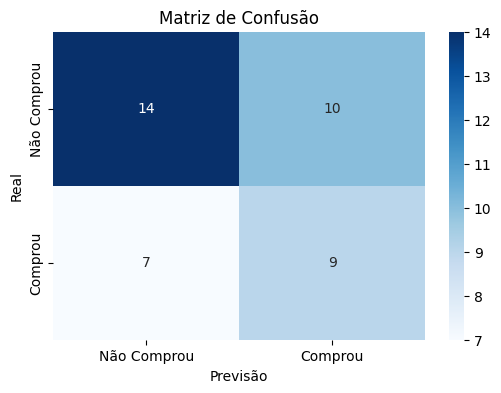

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Comprou", "Comprou"], yticklabels=["Não Comprou", "Comprou"])
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

**Interpretação dos Resultados**

○ Identificar quais variáveis mais influenciaram na decisão do modelo.

○ Explicar o desempenho do modelo e propor possíveis melhorias.

Importância das variáveis:
              Variável  Coeficiente
0                Idade     0.289416
3  Tempo no Site (min)     0.216850
2               Gênero     0.141893
1   Renda Anual (em $)    -0.001049
4      Anúncio Clicado    -0.040322


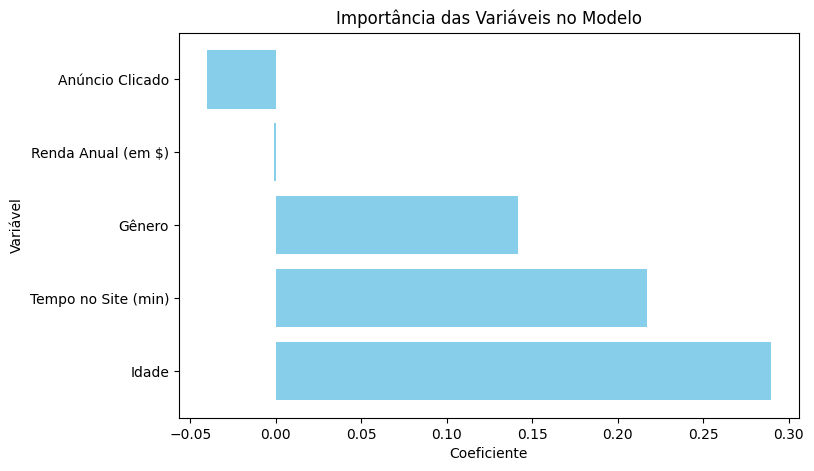

In [22]:
feature_importance = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Coeficiente', ascending=False)

print("Importância das variáveis:")
print(feature_importance)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Variável'], feature_importance['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.title('Importância das Variáveis no Modelo')
plt.show()

In [23]:
from sklearn.metrics import classification_report

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        24
           1       0.47      0.56      0.51        16

    accuracy                           0.57        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.59      0.57      0.58        40



In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(random_state=42, class_weight='balanced')

cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')

print("Acurácia por Fold:", cv_scores)
print("Acurácia Média:", cv_scores.mean())

Acurácia por Fold: [0.525 0.5   0.675 0.6   0.5  ]
Acurácia Média: 0.5599999999999999


Melhoria dos Dados:

Coletar mais dados para reduzir o desbalanceamento entre as classes.
Adicionar novas variáveis que possam influenciar a decisão (ex: localização ou tipo de imóvel).

Ajuste do Modelo:

Testar modelos mais complexos, como Gradient Boosting ou Random Forest, que lidam melhor com interações entre variáveis, já que a validação cruzada mostrou que o desempenho da Regressão Logística não é ideal.

Melhoria no Pré-processamento:

Experimentar técnicas diferentes de tratamento de variáveis categóricas, como embeddings (se o dataset for maior).


Usar métodos de seleção de variáveis para remover colunas que pouco influenciam.

Ajuste de Hiperparâmetros:

Para modelo de Regressão Logística que foi utilizado, ajustar o parâmetro de regularização (C) pode melhorar o desempenho.
